# Test of berke lab data in spyglass

In [ ]:
import spyglass.data_import as sgi
import spyglass.common as sgc

# NWB must live in stelmo/nwb/raw
nwb_file_name = "IM-1478_20220725_.nwb"
sgi.insert_sessions(nwb_file_name)

#sgc.Session & {"nwb_file_name": nwb_file_name}
#sgc.Session & {"lab_name": "Berke Lab"}

In [ ]:
import spyglass.data_import as sgi
import spyglass.common as sgc
from spyglass.common import Nwbfile
from pynwb import NWBHDF5IO, NWBFile
from hex_maze_behavior import HexMazeConfig, HexMazeBlock

# Path to an NWB file already in spyglass 
# nwb_file_name = "BraveLu20240519_.nwb"
nwb_file_name = "IM-1478_07252022_13_.nwb"
nwb_file_path = Nwbfile().get_abs_path(nwb_file_name)

# Confirm that behavior data is in this NWB
with NWBHDF5IO(nwb_file_path, 'r') as io:
    nwbfile = io.read()
        
    # Get trial and block data
    block_data = nwbfile.intervals["block"]
    trial_data = nwbfile.intervals["trials"]

    display(block_data)
    display(trial_data)

[2025-03-05 18:35:19,002][INFO]: Connecting scrater@lmf-db.cin.ucsf.edu:3306
[2025-03-05 18:35:19,049][INFO]: Connected scrater@lmf-db.cin.ucsf.edu:3306


block pynwb.epoch.TimeIntervals at 0x140583225129040
Fields:
  colnames: ['start_time' 'stop_time' 'epoch' 'block' 'maze_configuration' 'pA' 'pB'
 'pC' 'num_trials' 'task_type']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    epoch <class 'hdmf.common.table.VectorData'>,
    block <class 'hdmf.common.table.VectorData'>,
    maze_configuration <class 'hdmf.common.table.VectorData'>,
    pA <class 'hdmf.common.table.VectorData'>,
    pB <class 'hdmf.common.table.VectorData'>,
    pC <class 'hdmf.common.table.VectorData'>,
    num_trials <class 'hdmf.common.table.VectorData'>,
    task_type <class 'hdmf.common.table.VectorData'>
  )
  description: The block within a session. Each block is defined by a maze configuration and set of reward probabilities.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

trials pynwb.epoch.TimeIntervals at 0x140583226516384
Fields:
  colnames: ['start_time' 'stop_time' 'epoch' 'block' 'trial_within_block'
 'trial_within_epoch' 'start_port' 'end_port' 'reward' 'opto_condition'
 'duration' 'poke_in' 'poke_out']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    epoch <class 'hdmf.common.table.VectorData'>,
    block <class 'hdmf.common.table.VectorData'>,
    trial_within_block <class 'hdmf.common.table.VectorData'>,
    trial_within_epoch <class 'hdmf.common.table.VectorData'>,
    start_port <class 'hdmf.common.table.VectorData'>,
    end_port <class 'hdmf.common.table.VectorData'>,
    reward <class 'hdmf.common.table.VectorData'>,
    opto_condition <class 'hdmf.common.table.VectorData'>,
    duration <class 'hdmf.common.table.VectorData'>,
    poke_in <class 'hdmf.common.table.VectorData'>,
    poke_out <class 'hdmf.common.table.VectorData'>
  )
  description: experimental trials
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

### Step 2. Insert session from an NWB file with hex maze data (trial / block tables)

In [ ]:
from hex_maze_behavior import HexMazeConfig, HexMazeBlock
from spyglass.common import Nwbfile

# Name of NWB file to add to block and trial tables
#nwb_file_name = "IM-1478_07202022_.nwb"
#nwb_file_name = "IM-1788_20241221_.nwb"
nwb_file_name = "IM-1478_07252022_13_.nwb"

# Insert this session into HexMazeBlock, HexMazeBlock.Trial, and HexMazeConfig table
sgi.insert_sessions(nwb_file_name)
HexMazeBlock().load_from_nwb(nwb_file_name)

# All you need is this one line!! Wow!!

### Step 3. View the trial and block tables with your session added!

In [6]:
#%load_ext autoreload
#%autoreload 2
from hex_maze_behavior import HexMazeConfig, HexMazeBlock
import spyglass.common as sgc
from spyglass.common import Nwbfile
import spyglass.data_import as sgi

# Show the HexMazeBlock table
print("HexMazeBlock table:")
display(HexMazeBlock() & {"nwb_file_name":nwb_file_name})

# Show the Trial part table
print("HexMazeBlock().Trial part table:")
display(HexMazeBlock().Trial() & {"nwb_file_name":nwb_file_name})

# Show the HexMazeConfig table
print("HexMazeConfig table:")
display(HexMazeConfig() & {"nwb_file_name":nwb_file_name})


HexMazeBlock table:


*nwb_file_name *epoch    *block    config_id      p_a      p_b      p_c      num_trials     block_inte task_type     
+------------+ +-------+ +-------+ +------------+ +------+ +------+ +------+ +------------+ +--------+ +------------+
IM-1478_072520 0         1         11,12,14,15,18 10.0     50.0     90.0     68             =BLOB=     barrier change
IM-1478_072520 0         2         11,12,14,15,18 10.0     50.0     90.0     66             =BLOB=     barrier change
IM-1478_072520 0         3         11,12,14,15,20 10.0     50.0     90.0     54             =BLOB=     barrier change
 (Total: 3)

HexMazeBlock().Trial part table:


*nwb_file_name *epoch    *block    *block_trial_n epoch_trial_nu reward     start_port     end_port     opto_cond     trial_inte poke_inter duration    
+------------+ +-------+ +-------+ +------------+ +------------+ +--------+ +------------+ +----------+ +-----------+ +--------+ +--------+ +----------+
IM-1478_072520 0         1         1              1              0          None           B            None          =BLOB=     =BLOB=     18.4598     
IM-1478_072520 0         1         2              2              0          B              A            None          =BLOB=     =BLOB=     25.2901     
IM-1478_072520 0         1         3              3              1          A              B            None          =BLOB=     =BLOB=     39.59       
IM-1478_072520 0         1         4              4              0          B              A            None          =BLOB=     =BLOB=     11.8904     
IM-1478_072520 0         1         5              5              0          A              C            None          =BLOB=     =BLOB=     8.7623      
IM-1478_072520 0         1         6              6              0          C              A            None          =BLOB=     =BLOB=     24.3322     
IM-1478_072520 0         1         7              7              0          A              B            None          =BLOB=     =BLOB=     29.1491     
IM-1478_072520 0         1         8              8              0          B              A            None          =BLOB=     =BLOB=     17.2882     
IM-1478_072520 0         1         9              9              1          A              B            None          =BLOB=     =BLOB=     14.9015     
IM-1478_072520 0         1         10             10             1          B              C            None          =BLOB=     =BLOB=     40.6543     
IM-1478_072520 0         1         11             11             0          C              A            None          =BLOB=     =BLOB=     29.8722     
IM-1478_072520 0         1         12             12             1          A              B            None          =BLOB=     =BLOB=     13.4705     
   ...
 (Total: 188)

HexMazeConfig table:


*config_id     len_ab     len_bc     len_ac     path_length_di num_choice_poi num_cycles     choice_poi
+------------+ +--------+ +--------+ +--------+ +------------+ +------------+ +------------+ +--------+
10,11,19,20,22 17         17         23         6              1              0              =BLOB=    
10,14,15,25,26 21         19         15         6              1              1              =BLOB=    
11,12,14,15,18 17         15         17         2              1              3              =BLOB=    
11,12,14,15,18 17         17         15         2              3              4              =BLOB=    
11,12,14,15,20 15         17         17         2              1              3              =BLOB=    
11,14,15,16,28 15         19         19         4              1              2              =BLOB=    
7,11,12,14,20, 19         17         19         2              1              0              =BLOB=    
7,11,12,20,26, 17         23         19         6              1              0              =BLOB=    
7,11,14,20,26, 19         23         15         8              1              0              =BLOB=    
7,11,14,20,29, 15         19         15         4              1              1              =BLOB=    
7,14,20,23,30, 15         21         17         6              1              0              =BLOB=    
9,10,18,19,21, 21         19         21         2              1              0              =BLOB=    
   ...
 (Total: 16)

### Step 4: Analyze your data! 

(This one is up to you)

(but you can use the [Hex-maze](https://github.com/calderast/Hex-maze) repo to help!)

(0.0, 3.0)

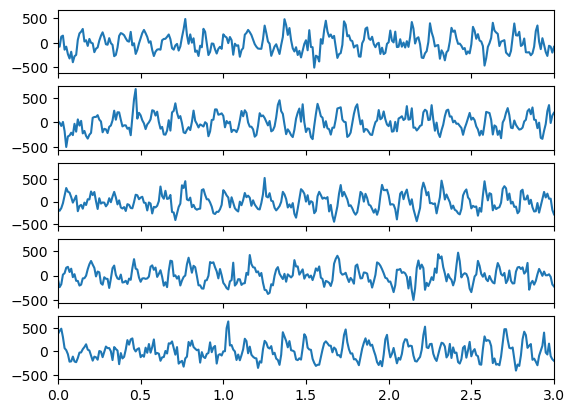

In [27]:
from spyglass.lfp.v1 import LFPV1, LFPSelection
from spyglass.common import interval_list_contains_ind
import matplotlib.pyplot as plt

# Define nwb and epoch of interest
file_name = "BraveLu20240519_.nwb"
key = {"nwb_file_name": file_name, "target_interval_list_name": "03_r2"}

# Get LFP data for this epoch 
lfp_df = (LFPV1() & key).fetch1_dataframe()

# Use Trial table to filter to unrewarded trials only
trial_query = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 3}
interval_list = trial_query.fetch("trial_interval")

# Plot LFP!
fig, ax_list = plt.subplots(nrows = 5,sharex=True)
for ax, interval in zip(ax_list, interval_list):
    ind = interval_list_contains_ind(interval[None,:], lfp_df.index)
    if ind.size == 0:
        continue
    t = lfp_df.index.values[ind][::10]
    t=t-t[0]
    ax.plot(t, lfp_df[0].values[ind][::10])
    # ax.axvspan(interval[0], interval[1], color='red', alpha=0.5)
plt.xlim(0,3)

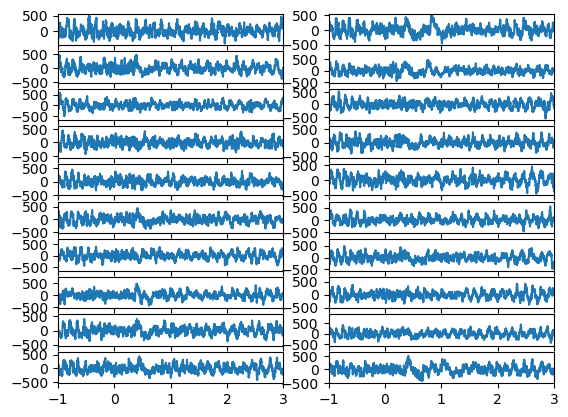

In [29]:
from spyglass.lfp.analysis.v1 import LFPBandV1
import matplotlib.pyplot as plt
import numpy as np

fig, ax_list = plt.subplots(nrows=10, sharex=True, ncols=2)

# lfp_df = (LFPBandV1() & key & {"filter_name":"Ripple 150-250 Hz"}).fetch1_dataframe()
# trial_query1 = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 5, "opto_cond": "no_delay"}
# trial_query2 = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 5, "opto_cond": "delay"}

# Plot comparison of LFP under different conditions (Rewarded vs. unrewarded, opto delay vs. no delay)

trial_query1 = (
    HexMazeBlock().Trial()
    & key
    & {"reward": 1, "epoch": 3, "opto_cond": "no_delay"}
)
trial_query2 = (
    HexMazeBlock().Trial()
    & key
    & {"reward": 1, "epoch": 3, "opto_cond": "delay"}
)

for i,trial_query in enumerate([trial_query1, trial_query2]):
    # trial_query
    interval_list = trial_query.fetch("trial_interval")
    interval_list = trial_query.fetch("poke_interval")

    for ax, interval in zip(ax_list[:,i], interval_list):
        ind = interval_list_contains_ind(np.array([[interval[0]-1,interval[0]+10]]), lfp_df.index)
        if ind.size == 0:
            continue
        t = lfp_df.index.values[ind][::1]
        t = t - interval[0]
        ax.plot(t, lfp_df[0].values[ind][::1])
        # ax.axvspan(interval[0], interval[1], color='red', alpha=0.5)
    plt.xlim(-1, 3)

Deleting from tables:

In [8]:
# To delete the entire HexMazeBlock table (and downstream):
#HexMazeBlock().drop()

# To delete a session from the block table (and downstream):
# key = {"nwb_file_name": nwb_file_name}
# (HexMazeBlock() & key).delete()